# Churn - 02 - EDA
## Setup

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import yaml

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
# pd.set_option('display.max_rows', None)

sns.set_style("darkgrid")

from IPython.display import display, Markdown
from pprint import pprint 

DEBUG = True
SEED = 666

In [66]:
DATASET = "Churn"

import os, sys
COLAB = 'google.colab' in sys.modules
ROOT = "./"

if COLAB:
  from google.colab import drive
  if not os.path.isdir("/content/gdrive"):
    drive.mount("/content/gdrive")
    d = "/content/gdrive/MyDrive/datasets"
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d)
  ROOT = f"/content/gdrive/MyDrive/datasets/{DATASET.replace(' ','_')}/"
  if not os.path.isdir(ROOT): os.makedirs(ROOT)


def makedirs(d):
  if COLAB:
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d)
  else:
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d, mode=0o777, exist_ok=True)

for d in ['orig','data','output']: makedirs(d)

### Functions

In [67]:
def eda_target(df, target):
  """Perform EDA on `target` column in `df` dataframe"""
  
  display(Markdown(f"### {target} (target)"))

  # value_counts
  display(df[target].value_counts(dropna=False, normalize=True))  
    
  # bar plot
  df[target].value_counts(dropna=False, normalize=True).plot(kind='bar')
  plt.show()
  
  # ...
  
  

In [68]:
def eda_categorical(df, target, feature):
  """Perform EDA on categorical `feature` with `target` column in `df` dataframe"""
  
  display(Markdown(f"### {feature}"))
  
  # value_counts
  display(df[feature].value_counts(dropna=False, normalize=True))
  
  # bar plot
  df[feature].value_counts(dropna=False, normalize=True).plot(kind='bar')
  plt.show()
  
  # ralation to target - chi2
  
  

In [69]:
def eda_numeric(df, target, feature):
  """Perform EDA on numeric `feature` with `target` column in `df` dataframe"""
  
  display(Markdown(f"### {feature}"))
  
  # hist + boxplot
  df[feature].plot(kind='hist')
  plt.show()
  df.boxplot(column=feature)
  plt.show()
  
  # relation to target - boxplot by target
  df.boxplot(column=feature, by=target)
  
  

## Dataset

In [70]:
df = pd.read_pickle(ROOT+"data/data.pkl")
print(df.shape)
df.head()

(7043, 20)


,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,Onlinebackup,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Churn
0,Female,Yes,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,Yes,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,Yes,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,Yes,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,Yes,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [71]:
target = "Churn"

features = list(df.columns)

if target in features: features.remove(target)
cat_features = [f for f in features if f in df.select_dtypes(include='category').columns]
num_features = [f for f in features if f not in cat_features]

print(f"target: {target} \n")
print(f"cat_features: {cat_features} \n")
print(f"num_features: {num_features} \n")

target: Churn 

cat_features: ['Gender', 'Seniorcitizen', 'Partner', 'Dependents', 'Phoneservice', 'Multiplelines', 'Internetservice', 'Onlinesecurity', 'Onlinebackup', 'Deviceprotection', 'Techsupport', 'Streamingtv', 'Streamingmovies', 'Contract', 'Paperlessbilling', 'Paymentmethod'] 

num_features: ['Tenure', 'Monthlycharges', 'Totalcharges'] 


## EDA

### Churn (target)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

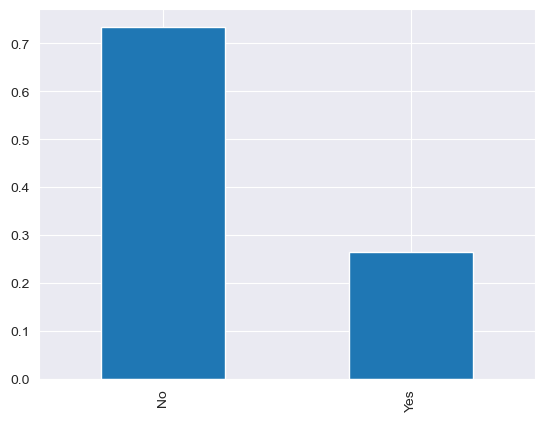

In [72]:
eda_target(df, target)

### Gender

Male      0.504756
Female    0.495244
Name: Gender, dtype: float64

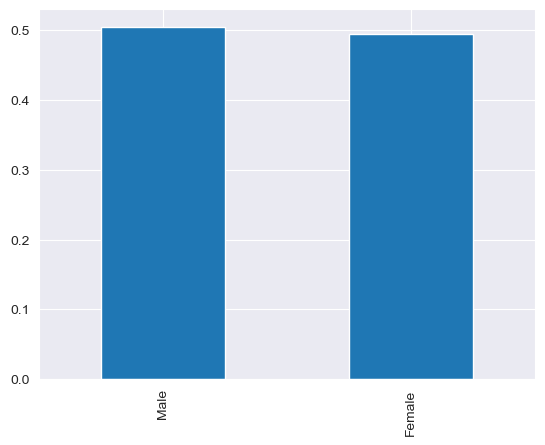

### Seniorcitizen

Yes    0.837853
No     0.162147
Name: Seniorcitizen, dtype: float64

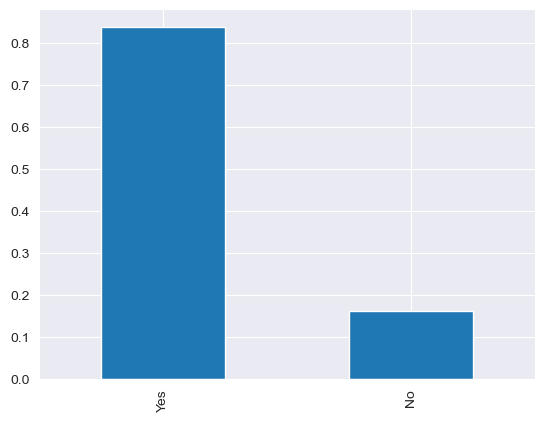

### Partner

No     0.516967
Yes    0.483033
Name: Partner, dtype: float64

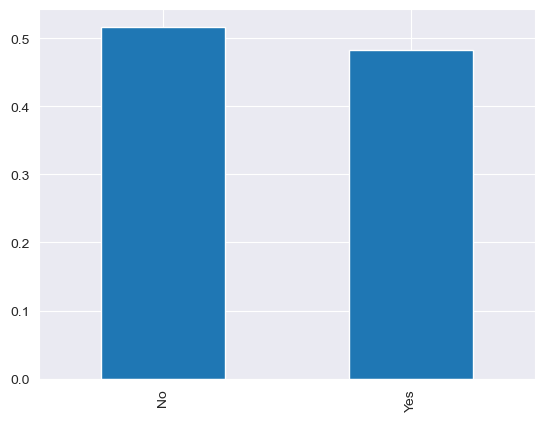

### Dependents

No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64

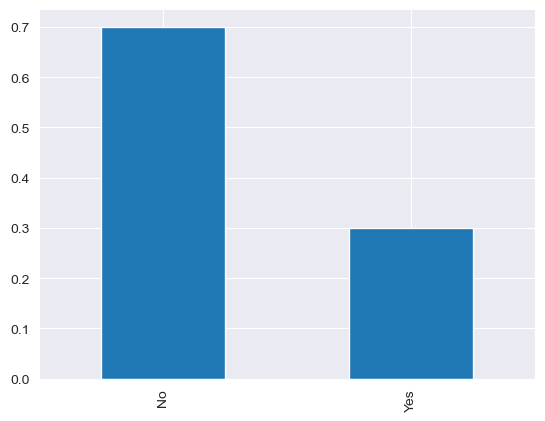

### Phoneservice

Yes    0.903166
No     0.096834
Name: Phoneservice, dtype: float64

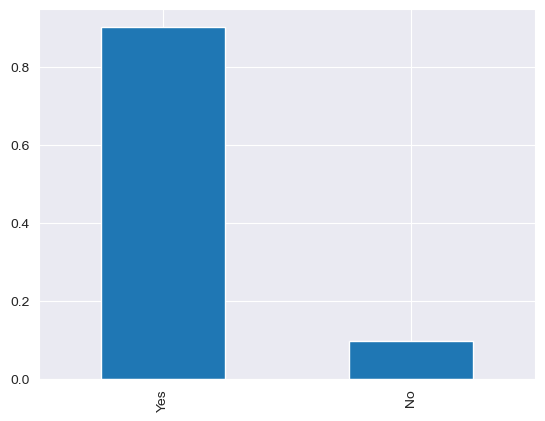

### Multiplelines

No     0.578163
Yes    0.421837
Name: Multiplelines, dtype: float64

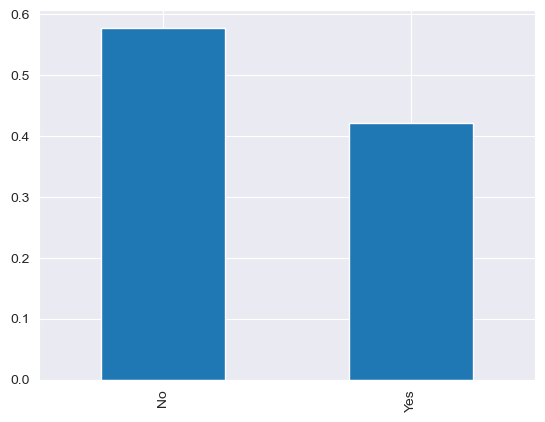

### Internetservice

Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: Internetservice, dtype: float64

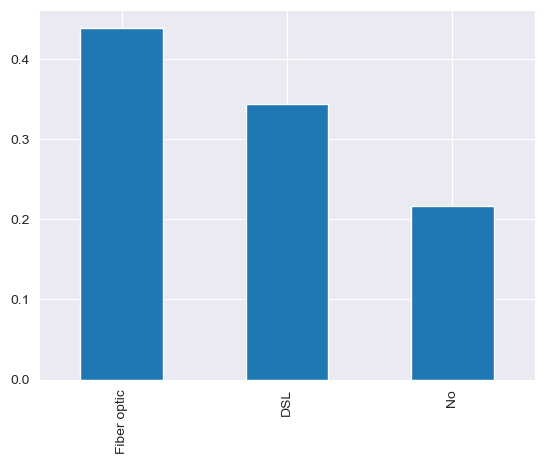

### Onlinesecurity

No     0.713332
Yes    0.286668
Name: Onlinesecurity, dtype: float64

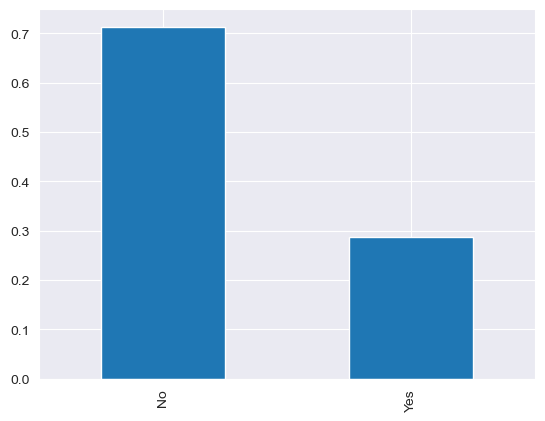

### Onlinebackup

No     0.655119
Yes    0.344881
Name: Onlinebackup, dtype: float64

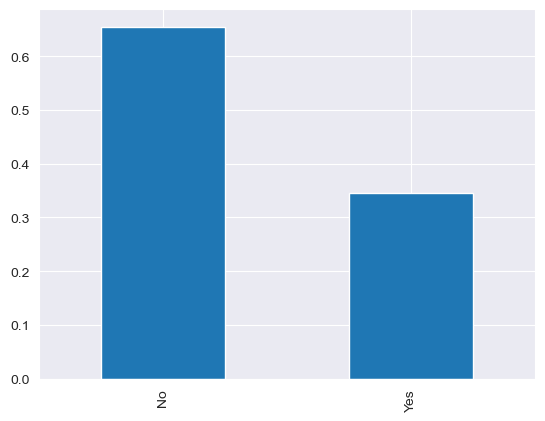

### Deviceprotection

No     0.656112
Yes    0.343888
Name: Deviceprotection, dtype: float64

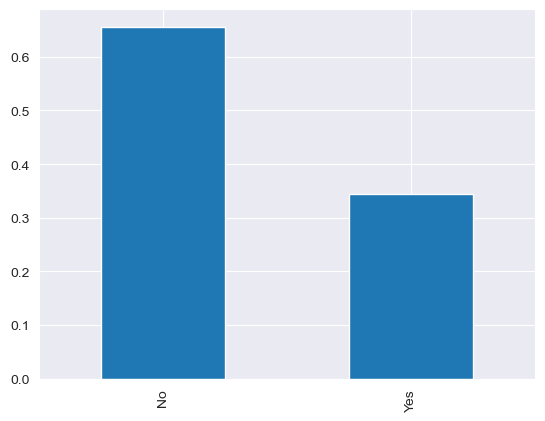

### Techsupport

No     0.709783
Yes    0.290217
Name: Techsupport, dtype: float64

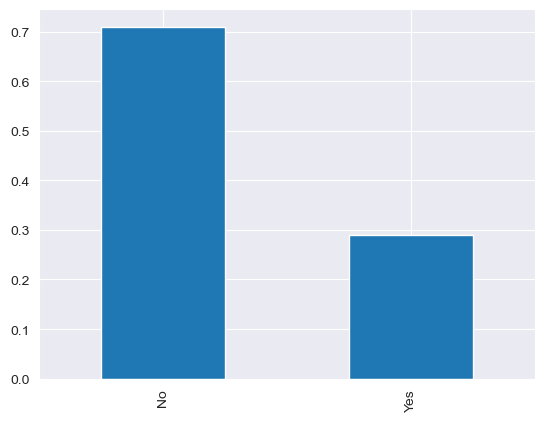

### Streamingtv

No     0.615647
Yes    0.384353
Name: Streamingtv, dtype: float64

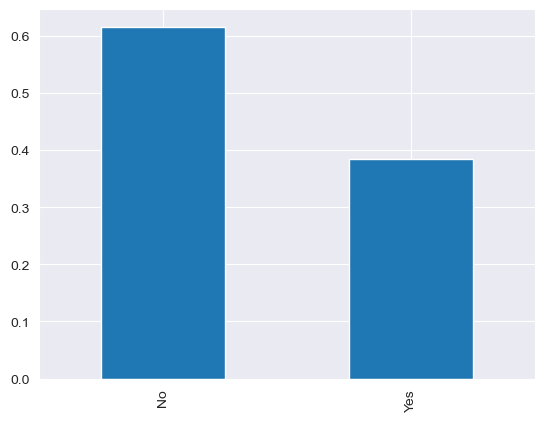

### Streamingmovies

No     0.612097
Yes    0.387903
Name: Streamingmovies, dtype: float64

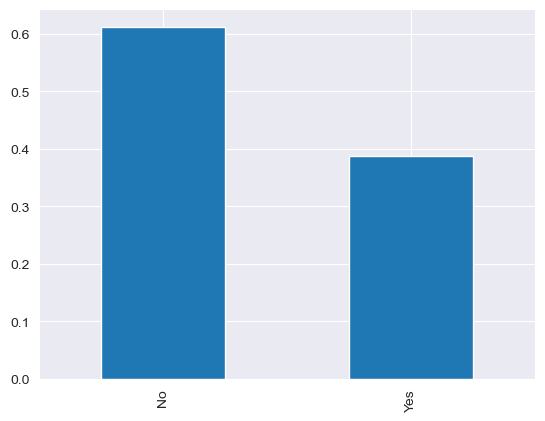

### Contract

Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: Contract, dtype: float64

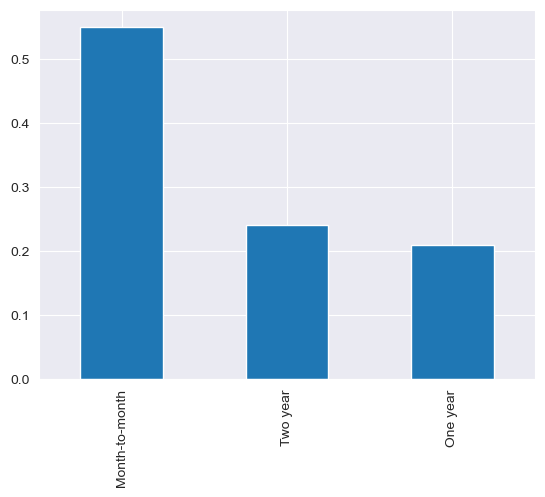

### Paperlessbilling

Yes    0.592219
No     0.407781
Name: Paperlessbilling, dtype: float64

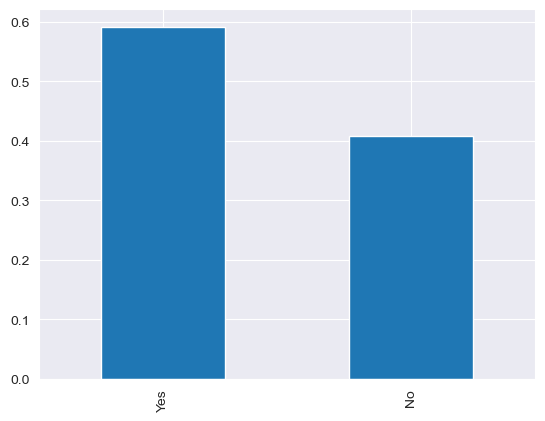

### Paymentmethod

Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: Paymentmethod, dtype: float64

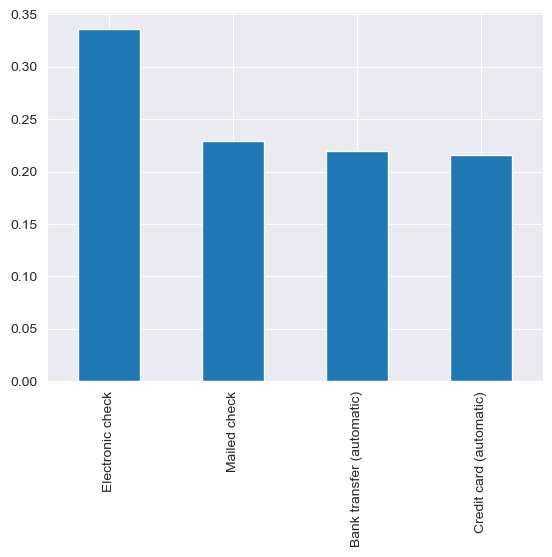

In [73]:
for f in cat_features:
  eda_categorical(df, target, f)

### Tenure

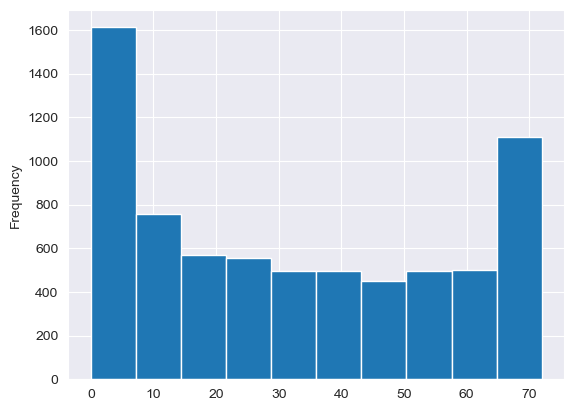

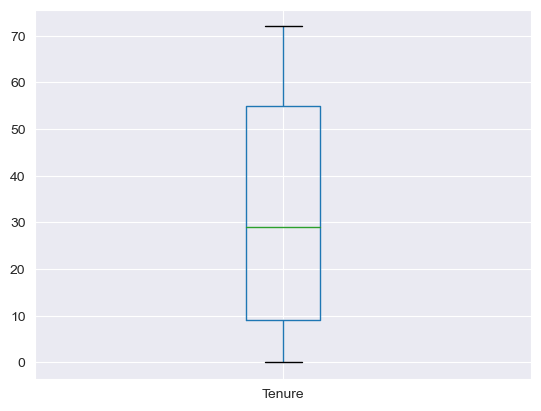

### Monthlycharges

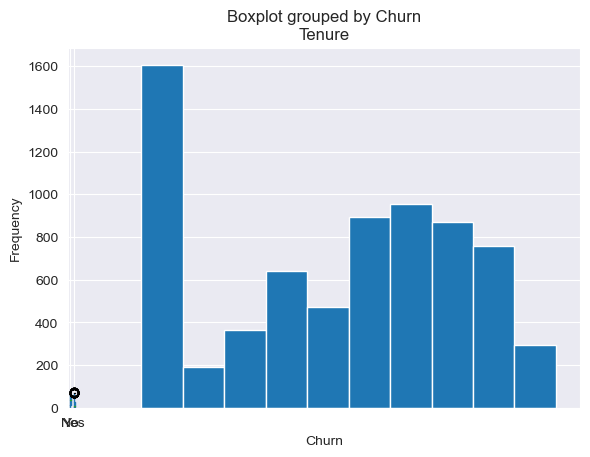

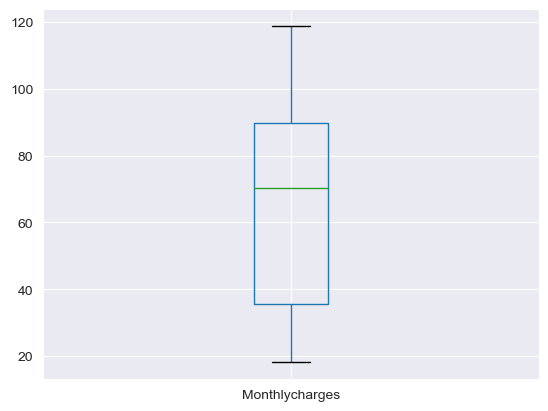

### Totalcharges

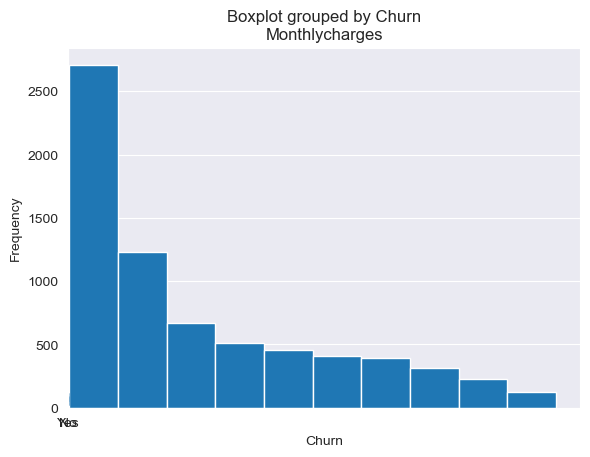

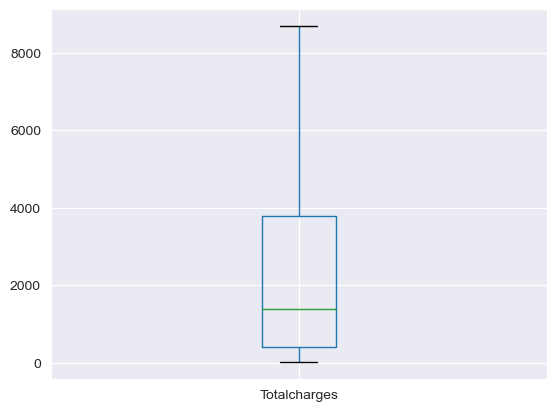

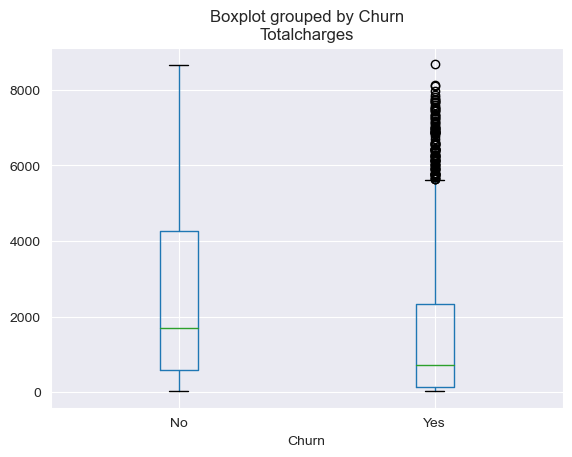

In [74]:
for f in num_features:
  eda_numeric(df, target, f)